# 오픈마켓 카테고리별 특성 파악

## 1. 데이터 수집(셀레니움 방식)

In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import math
from tqdm.notebook import tqdm
from selenium import webdriver
import time
from datetime import datetime

In [35]:
def 함수(soup,choice):    
    result = []
    경로 = []
    경로2 = []
    for link in soup.find_all('a',class_="itemcard__link"):
        경로.append(link.get('href'))
    for i in range(0,len(경로),2) :
        경로2.append(경로[i])
    for i in tqdm(range(choice)):
        이름 = soup.select('#bestContentsList > ul > li > div > div > div.itemcard__info__major > a > span > span.itemcard__title__name ' )[i].text
        가격 = soup.select('#bestContentsList > ul > li > div > div > div.itemcard__info__major > a > p > span > strong ' )[i].text
        구매 = soup.select('#bestContentsList > ul > li > div > div > div.itemcard__info__action > ul > li > span > b:nth-of-type(1)' )[i].text
        url2 = "https://www.g9.co.kr"+경로2[i]
        req = requests.get(url2)
        cont = req.content
        soup = BeautifulSoup(cont, 'html.parser')
        대분류 = soup.select('#container > div.vip_contents.vip_v3 > div.select_location > div:nth-of-type(1) > a')[0].text
        대분류 = 대분류.strip()
        중분류 = soup.select('#container > div.vip_contents.vip_v3 > div.select_location > div:nth-of-type(2) > a')[0].text
        중분류 = 중분류.strip()
        try:
            소분류 = soup.select('#container > div.vip_contents.vip_v3 > div.select_location > div:nth-of-type(3) > a')[0].text
            소분류 = 소분류.strip()
        except :
            소분류 = ''

        data = [이름,가격,구매,대분류,중분류,소분류]
        result.append(data)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
    return result

In [ ]:
driver = webdriver.Chrome(r'chromedriver.exe')
driver.implicitly_wait(3) # 잠시대기
driver.get('https://www.g9.co.kr/Display/Best')

while True :
    print("""카테고리 번호는 
전체 : 1, 해외직구: 2, 맛있는지구 : 3, 식품 : 4 뷰티 : 5
백화점.몰 : 6 , 홈스타일링 : 7, 주방.생필품 : 8, 가구.리빙.반려 : 9 , 가전 : 10 
컴퓨터 : 11 , 패션의류 : 12 , 신발.가방.주얼리 : 13 , 건강.자동차공구 : 14 , 출산.유아동 : 15
레저.아웃도어 : 16 , 취미.문구.도서 : 17 , e쿠폰 : 18 , 여행 : 19  , 패션편집샵 : 20
""")
    choice = int(input('원하는 숫자를 입력해주세요 : '))
    if 1 <= choice <=20:
        if choice >=15 :
            next1 = driver.find_element_by_xpath('//*[@id="plug-swipe-list1"]/button[2]')
            next1.click()
            number = driver.find_element_by_xpath(f'//*[@id="plug-swipe-list1"]/div/div/div[{choice}]/div/div/div/button')
            number.click()
            time.sleep(1)
        number = driver.find_element_by_xpath(f'//*[@id="plug-swipe-list1"]/div/div/div[{choice}]/div/div/div/button')
        number.click()            
        time.sleep(1)
        while True :
            choice = int(input('실시간: 0, 주간:1 선택해주세요'))
            if choice == 1:
                number = driver.find_element_by_xpath('//*[@id="contents"]/div[2]/ul/li[2]/button')
                number.click()
                break
            elif choice == 0:
                break
            print('다른 번호를 입력하셨습니다. ')
    else:
        print('다른번호를 입력하셨습니다.')
        continue           
    
    break
time.sleep(1)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
이름 = soup.select('#bestContentsList > ul > li > div > div > div.itemcard__info__major > a > span > span.itemcard__title__name ' )
print(f"선택한 페이지에서 상품 수는 {len(이름)}입니다. 몇개를 추출하시겠습니까?")
choice = int(input('고르기 : '))
result = 함수(soup,choice)
print("끝")

results_df = pd.DataFrame(result)
results_df.columns = ['title', 'price','구매','대','중','소']

today = datetime.today().strftime('%m.%d %H.%m')
results_df.to_csv(f'{today}.csv')
results_df

카테고리 번호는 
전체 : 1, 해외직구: 2, 맛있는지구 : 3, 식품 : 4 뷰티 : 5
백화점.몰 : 6 , 홈스타일링 : 7, 주방.생필품 : 8, 가구.리빙.반려 : 9 , 가전 : 10 
컴퓨터 : 11 , 패션의류 : 12 , 신발.가방.주얼리 : 13 , 건강.자동차공구 : 14 , 출산.유아동 : 15
레저.아웃도어 : 16 , 취미.문구.도서 : 17 , e쿠폰 : 18 , 여행 : 19  , 패션편집샵 : 20

원하는 숫자를 입력해주세요 : 1
실시간: 0, 주간:1 선택해주세요0
선택한 페이지에서 상품 수는 100입니다. 몇개를 추출하시겠습니까?
고르기 : 100


In [ ]:
#results_df.to_excel('./식품_실시간_0월00이.xlsx', index= False)

## 2. 데이터 전처리

In [9]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 파일 불러오기

In [10]:
df1=pd.read_excel('./식품_실시간_1월22일.xlsx')
df2=pd.read_excel('./식품_주간_1월22일.xlsx')
'''
df1=pd.read_excel('./뷰티_실시간_1월22일.xlsx')
df2=pd.read_excel('./뷰티_주간_1월22일.xlsx')
'''
'''
df1=pd.read_excel('./홈스타일링_실시간_1월22일.xlsx')
df2=pd.read_excel('./홈스타일링_주간_1월22일.xlsx')
'''

"\ndf1=pd.read_excel('./홈스타일링_실시간_1월22일.xlsx')\ndf2=pd.read_excel('./홈스타일링_주간_1월22일.xlsx')\n"

### str을 int로 변환하기 1) ','제거 2) 형변환

In [11]:
df1['구매']= df1['구매'].str.replace(',','')
df1['price']= df1['price'].str.replace(',','')
df2['구매']= df2['구매'].str.replace(',','')
df2['price']= df2['price'].str.replace(',','')

In [12]:
df1['구매']=df1['구매'].astype(int)
df1['price']=df1['price'].astype(int)
df2['구매']=df2['구매'].astype(int)
df2['price']=df2['price'].astype(int)

### 랭킹, 매출량 칼럼 추가

In [13]:
list = []
for i in range(1,101):
    list.append(i)
    
df1['랭킹'] = list
df2['랭킹'] = list

df1['매출량'] = df1['price'] * df1['구매']
df2['매출량'] = df2['price'] * df2['구매']

### 실시간, 주간 결합 테이블 d3 생성

In [14]:
df11= df1[['title', '랭킹']]
df22 = df2[['title','랭킹']]
df3 = pd.merge(df11,df22 ,on = 'title', how='inner')
df3 = df3.rename({'랭킹_x':'랭킹(주간)', '랭킹_y':'랭킹(실시간)'}, axis='columns')

In [15]:
df1

,Unnamed: 0,title,price,구매,대,중,소,랭킹,매출량
0,0,찹쌀 모싯잎 오쟁이 떡 1.2kg (40g x 30개),11900,3919,식품,떡·한과,찹쌀·두텁·인절미,1,46636100
1,1,고창 김민상님의 황토밭 꿀고구마 10kg한입,20610,1,식품,채소,고구마,2,20610
2,2,킹프로폴리스/100ml 2병/ 무화학첨가제,67640,77,식품,홍삼·인삼·꿀,프로폴리스,3,5208280
3,3,아삭아삭 경북 부사 가정용 흠집 사과 10kg (58-70과),20900,8,식품,과일·견과,사과·배,4,167200
4,4,메가크루 메가타민 1박스(2개입:800mgx60정x2),43610,1960,식품,건강식품,멀티비타민,5,85475600
...,...,...,...,...,...,...,...,...,...
95,95,뉴트리원 루테인지아잔틴 164AX아스타잔틴 100정1박스,40940,135,식품,건강식품,성분별 건강식품,96,5526900
96,96,부세조기 1박스 15마리내외 조기 굴비 제수용 생선,28710,75,식품,수산,조기,97,2153250
97,97,롯데 의성마늘 로스팜2호 선물세트/감사선물/판촉물,30180,87887,식품,통조림·즉석밥,햄통조림,98,-1642537636
98,98,스파클생수 2L 30병,13650,9,식품,생수·탄산수,기타생수,99,122850


In [16]:
df1_head = df1.head(10)
df1_head

,Unnamed: 0,title,price,구매,대,중,소,랭킹,매출량
0,0,찹쌀 모싯잎 오쟁이 떡 1.2kg (40g x 30개),11900,3919,식품,떡·한과,찹쌀·두텁·인절미,1,46636100
1,1,고창 김민상님의 황토밭 꿀고구마 10kg한입,20610,1,식품,채소,고구마,2,20610
2,2,킹프로폴리스/100ml 2병/ 무화학첨가제,67640,77,식품,홍삼·인삼·꿀,프로폴리스,3,5208280
3,3,아삭아삭 경북 부사 가정용 흠집 사과 10kg (58-70과),20900,8,식품,과일·견과,사과·배,4,167200
4,4,메가크루 메가타민 1박스(2개입:800mgx60정x2),43610,1960,식품,건강식품,멀티비타민,5,85475600
5,5,애플망고 8~9수 4kg 페루산 (정품 정과),32310,3,식품,과일·견과,냉동·수입기타,6,96930
6,6,동원 양반김 선물세트 올리브유김 3세트,22500,1889,식품,반찬·요리,볶음밥·간편조리,7,42502500
7,7,나주배 신고배 7.5kg 14-15과 특품,36900,1,식품,과일·견과,사과·배,8,36900
8,8,삼진어묵 이금복 명품 세트 2호,57420,89,식품,선물의정석,베스트브랜드,9,5110380
9,9,4Life 트랜스퍼 팩터 플러스 아연 90캡슐 5+1,353780,1,식품,건강식품,건강환,10,353780


In [17]:
df2

,title,price,구매,대,중,소,랭킹,매출량
0,NEW 신제품 얇은피 교자만두 8봉 골라담기,30190,120,식품,반찬·요리,만두,1,3622800
1,간편하게 먹는 간편국 3종 20입 모음,24000,8798,식품,반찬·요리,찌개·국·탕,2,211152000
2,청정우 차돌박이 (3초구이 샤브용) 250g+250g+250g,15210,26,식품,축산,수입소고기,3,395460
3,농심 튀김우동 큰사발 (1BOX) - 16개,14250,1388,식품,라면·냉면·면류,우동·쫄면,4,19779000
4,풀무원 노엣지꽉찬토핑피자 3종 4판 모음,24850,398,식품,반찬·요리,핫도그·피자·버거,5,9890300
...,...,...,...,...,...,...,...,...
95,매일 뼈로가는칼슘두유 950ml 10팩 /뼈칼/두유/우유,12200,20382,식품,우유·두유,두유,96,248660400
96,베이비 생유산균 60봉,25160,5,식품,건강식품,성분별 건강식품,97,125800
97,맛있는 오뚜기밥 210g X 36개/즉석밥/햇반,29820,1057,식품,통조림·즉석밥,즉석밥,98,31519740
98,오룡식품 마늘빵 바게트 냉동마늘빵 가당 1kg(60개),20920,1,식품,빵·스낵·빙과,빵·냉동생지,99,20920


In [18]:
df2_head = df2.head(10)
df2_head

,title,price,구매,대,중,소,랭킹,매출량
0,NEW 신제품 얇은피 교자만두 8봉 골라담기,30190,120,식품,반찬·요리,만두,1,3622800
1,간편하게 먹는 간편국 3종 20입 모음,24000,8798,식품,반찬·요리,찌개·국·탕,2,211152000
2,청정우 차돌박이 (3초구이 샤브용) 250g+250g+250g,15210,26,식품,축산,수입소고기,3,395460
3,농심 튀김우동 큰사발 (1BOX) - 16개,14250,1388,식품,라면·냉면·면류,우동·쫄면,4,19779000
4,풀무원 노엣지꽉찬토핑피자 3종 4판 모음,24850,398,식품,반찬·요리,핫도그·피자·버거,5,9890300
5,참닭 춘천 닭갈비 700g+700g/찜닭/갈비/양념육,12900,21938,식품,축산,양념육·가공육,6,283000200
6,단팥붕어빵 22개입(500g)+슈크림붕어빵 22개입(500g),11570,40,식품,반찬·요리,전·튀김,7,462800
7,토이쿠키만들기 2종 3박스,23770,1618,식품,빵·스낵·빙과,케이크,8,38459860
8,청정원 순창 우리쌀로만든 미소된장 된장찌개 450gx2개,10600,32,식품,소스·양념·분말,된장·청국장,9,339200
9,프레시지 밀푀유나베 2인분 외 전골/찌개류,15900,1449,식품,선물의정석,베스트브랜드,10,23039100


In [19]:
df3

,title,랭킹(주간),랭킹(실시간)
0,고창 김민상님의 황토밭 꿀고구마 10kg한입,2,34
1,아삭아삭 경북 부사 가정용 흠집 사과 10kg (58-70과),4,22
2,아삭아삭 경북 부사 가정용 흠집 사과 5kg (26-33과),12,42
3,천하일품 제주감귤 10kg 소과로얄,13,86
4,강진농협 새청무쌀 10kg 2020년 햅쌀 출하,14,46
5,뉴케어 구수한맛 200ml x 30팩 /친숙한맛 균형영양식,15,58
6,대한곱창 곱창전골 (3인분),16,17
7,베이비 생유산균 60봉,18,97
8,CJ제일제당 햇반 210g 24개 무료배송,19,87
9,덴마크 인포켓치즈 20gx40개 스트링치즈,23,21


In [20]:
df3.describe()

,랭킹(주간),랭킹(실시간)
count,20.00000,20.000000
mean,36.10000,47.150000
std,27.93206,27.145369
min,2.00000,6.000000
25%,14.75000,25.750000
50%,24.00000,45.500000
75%,58.00000,58.750000
max,88.00000,97.000000


## 3. 데이터 시각화 (df1 : 실시간 df2 : 주간) *코드 default 주간

In [21]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])
import seaborn  as sns

['NanumGothic']


In [22]:
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
 
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [23]:
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
 
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [24]:
fig = plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

### 중분류 groupby, 카테고리 중분류 비율

In [25]:
df2.groupby('중').count()

,title,price,구매,대,소,랭킹,매출량
중,,,,,,,
건강식품,3,3,3,3,3,3,3
과일·견과,11,11,11,11,11,11,11
김치·절임배추,1,1,1,1,1,1,1
다이어트식품,1,1,1,1,1,1,1
떡·한과,1,1,1,1,1,1,1
라면·냉면·면류,1,1,1,1,1,1,1
반찬·요리,9,9,9,9,9,9,9
빵·스낵·빙과,10,10,10,10,10,10,10
생수·탄산수,3,3,3,3,3,3,3


In [26]:
df2_중  = df2.groupby('중').count() #랭킹 100 안에 카테고리별  개수
df2_중 = df2_중[['title']]

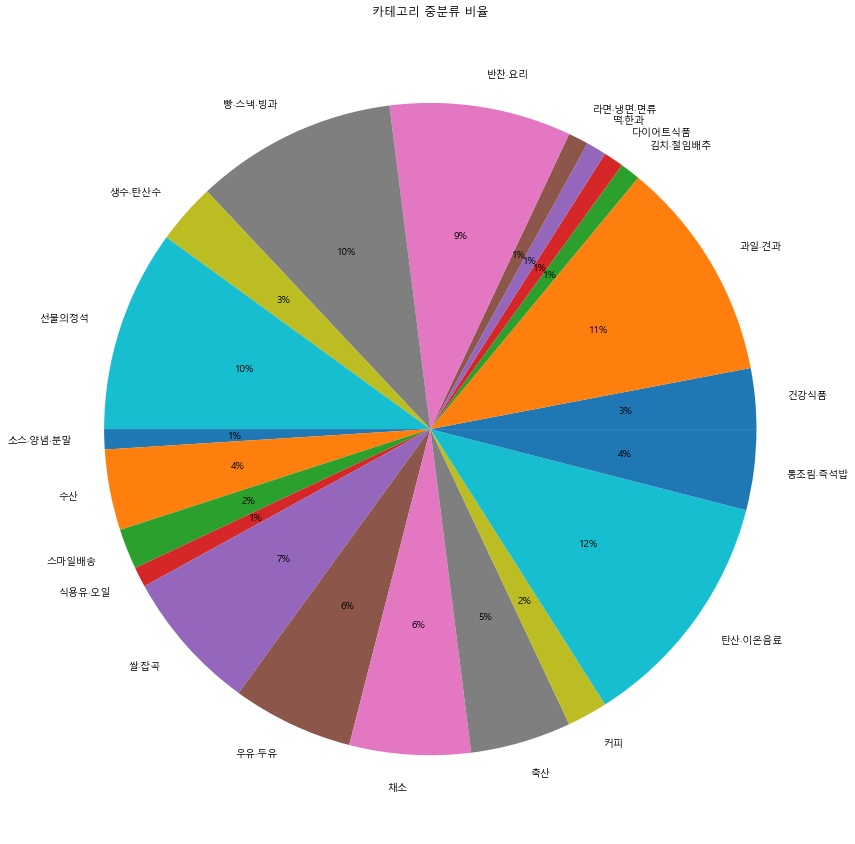

In [27]:
plt.figure(figsize=(18,15)) #원사이즈 조절 가능
plt.title('카테고리 중분류 비율')

plt.pie(df2_중['title'], labels = df2_중.index, autopct='%0.0f%%')
plt.show()

### Top 10 (df1_head or df2_head) 그래프

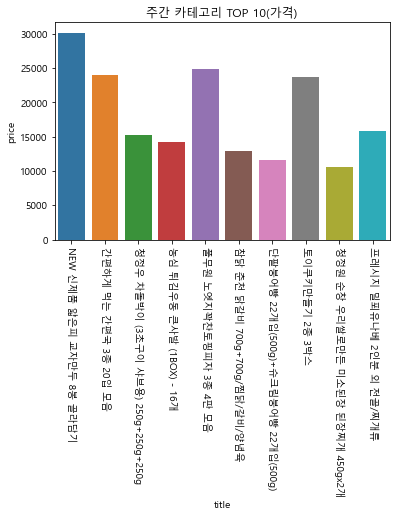

In [28]:
sns.barplot(x= 'title', y='price' , data= df2_head)
plt.title('주간 카테고리 TOP 10(가격)')
plt.xticks(rotation =270)
plt.show()

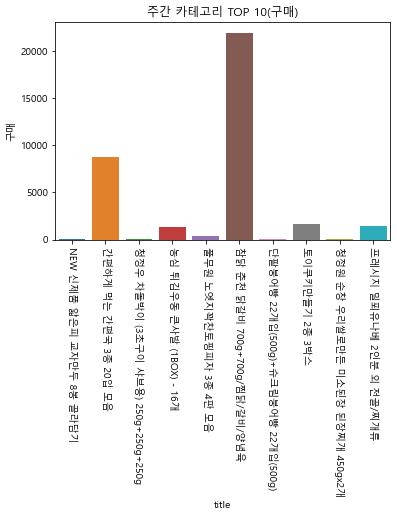

In [29]:
sns.barplot(x= 'title', y='구매' , data= df2_head)
plt.title('주간 카테고리 TOP 10(구매)')
plt.xticks(rotation =270)
plt.show()

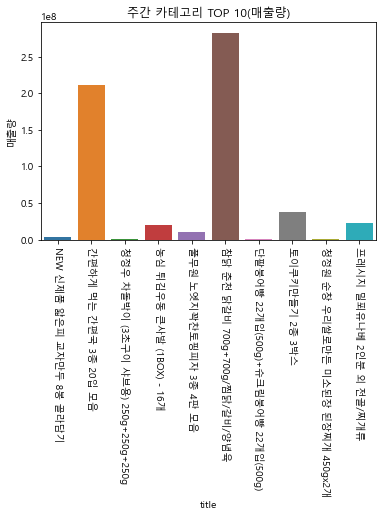

In [30]:
sns.barplot(x= 'title', y='매출량' , data= df2_head)
plt.title('주간 카테고리 TOP 10(매출량)')
plt.xticks(rotation =270)
plt.show()

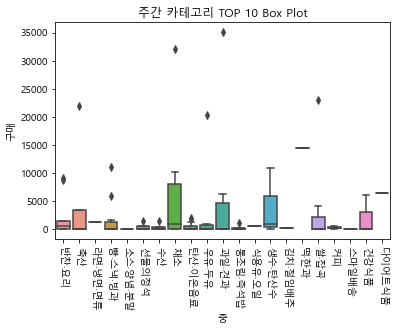

In [31]:
sns.boxplot(x = "중", y = "구매", data = df2)
plt.title('주간 카테고리 TOP 10 Box Plot')

plt.xticks(rotation =270)
plt.show()